# Ambev data challenge
## Adriano Freitas

## Análise dos dados

### Entendimento básico

As metas estão atreladas a KPIs, cada KPI tem um peso (coluna `per_peso_kpi`) que retrata o percentual daquele KPI na meta final, ou seja, deve somar 100 para cada pessoa representando 100% da meta.

Além disso cada métrica possui um status indicando se o monitoramento foi aprovado ou não (coluna `bin_status_meta`). As métricas que não tiveram o monitoramento aprovado não possuem o percentual anotado nas colunas de acompanhamento descritas abaixo (evidenciado pela análise de nulos anterior e pelo código abaixo), sendo assim elas não são objeto de nossa análise e serão excuídas do dataset. Infelizmente isso representa mais da metade do nosso dataset.

Conforme pode ser observado [neste documento](http://cvmautomatico.mz-ir.com/Download.aspx?id=SFn7CoUwQkP55UPRxYdjbA%3D%3D\JjCvAYu5DGR9ZE0nMi9m%2FQ%3D%3D), o exercício social encerra-se em 31/12.

Não existem informações claras sobre cada variável, vamos assumir as seguintes premissas:

Como o último mês do dataset é também o fim do exercício, seria de se esperar que percentual da meta acumulado (coluna `per_acum_acumulado`) fosse igual ao percentual da meta atingido no final do exercício (coluna `per_acum_fim_exer`). Como isso não acontece podemos trabalhar com duas hipóteses:
1. O resultado exibido no mês refere-se ao mês anterior
2. O valor das colunas referentes ao final do exercício são projeções.

Vamos seguir em frente com a segunda hipótese. Na análise exploratória podemos validar melhor essa hipótese.

Temos 3 tipos de variáveis que retratam o atingimento das metas, são eles:
- **Atingido (ating)**: Qual é o percentual da meta atingido no mês.
- **Pontos (pontos)**: Os pontos são calculados baseado na regra de atingimento parcial (coluna `nom_regra_alcance_parcial`). Este valor é utilizado para calcular o atingimento final da meta.
- **Acumulativo (acum)**: Mostra de forma acumulativa decompondo a meta pelo peso do KPI. Esta coluna é calculada aplicando o peso do kpi sobre os pontos.

Esse trio se repete em três momentos distintos:
- **Mensal (mes)**: Qual é o status mensal de cada uma das medidas.
- **Acumulado (acumulado)**: Qual é o status acumulado até o momento de todos os meses. Possuem 10 meses ao todo.
- **Exercício (exer)**: Qual é a projeção para o fim do exercício.

In [1]:
%%capture

%run ./00-agf-utils.ipynb

%store -r default_color
%store -r default_light_color
%store -r default_dark_color
%store -r colormap
%store -r figsize

In [2]:
data_path = '../data/processed/'
file_name = 'ambev-final-dataset-processed.csv'

In [3]:
df = pd.read_csv(os.path.join(data_path, file_name))

/Users/adrianofreitas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
meta = get_meta(df)

## Colunas com a mesma informação

Podemos observar que as colunas abaixo nos passam a mesma informação. No nosso modelo podemos considerar apenas uma delas.

Text(0.5,0.98,'dis_grade vs nom_banda')

Text(0.5,0,'dis_grade')

Text(0,0.5,'Observações')

Text(0.5,0,'nom_banda')

Text(0,0.5,'Observações')

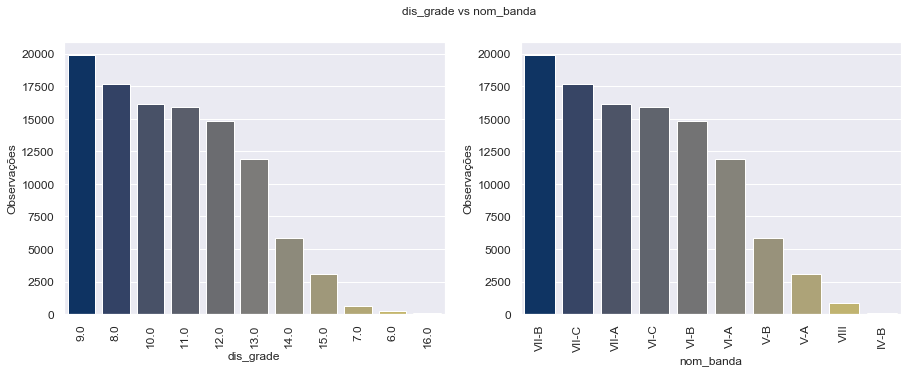

In [5]:
fig, axs = plt.subplots(1, 2, figsize=figsize)
plt.suptitle('dis_grade vs nom_banda')

descending_order = df['dis_grade'].value_counts().sort_values(ascending=False).index
ax1 = sns.countplot(df['dis_grade'], palette=colormap, order=descending_order, ax=axs[0])
ax1.set_xlabel('dis_grade')
ax1.set_ylabel('Observações')
for tick in axs[0].get_xticklabels():
    tick.set_rotation(90)

descending_order = df['nom_banda'].value_counts().sort_values(ascending=False).index
ax2 = sns.countplot(df['nom_banda'], palette=colormap, order=descending_order, ax=axs[1])
ax2.set_xlabel('nom_banda')
ax2.set_ylabel('Observações')
for tick in axs[1].get_xticklabels():
    tick.set_rotation(90)

plt.show()

## KPI vs Funcionários

Vamos observar alguns números importantes considerando apenas os dados válidos, ou seja, após o processo de limpeza dos dados.

- **Funcionários**: 6.120
- **KPIs**: 1.469
- **KPIs por Funcionários**: 2 para maioria.
- **KPIs simultâneas por Funcionários**: 2 para a maioria.

Text(0.5,0.98,'KPIs por Funcionário')

Text(0.5,0,'Qtde KPIs')

Text(0,0.5,'Qtde Fucionários')

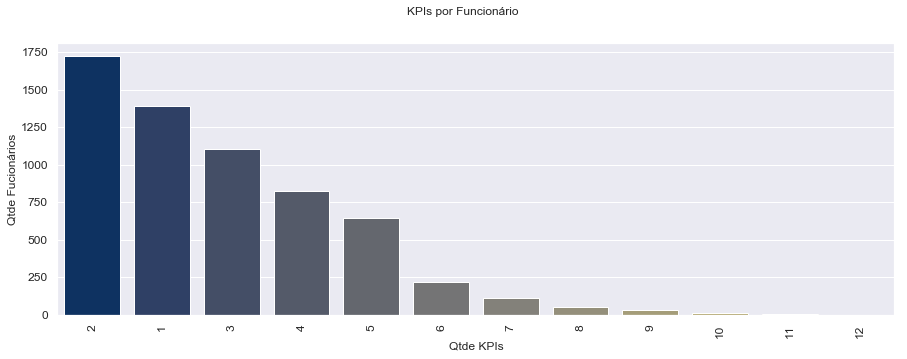

In [6]:
# Contagem de valores únicos por funcionários
group_func = df.groupby('dis_nome_funcionario').nunique()

# Quantidade de KPIs por Funcionário
descending_order = group_func['nom_codigo_kpi'].value_counts().sort_values(ascending=False).index

fig, axs = plt.subplots(figsize=figsize)
plt.suptitle('KPIs por Funcionário')

ax1 = sns.countplot(group_func['nom_codigo_kpi'], palette=colormap, order=descending_order)
ax1.set_xlabel('Qtde KPIs')
ax1.set_ylabel('Qtde Fucionários')
for tick in axs.get_xticklabels():
    tick.set_rotation(90)

Text(0.5,0.98,'KPIs Simultâneas por Funcionário')

Text(0.5,0,'Qtde KPIs')

Text(0,0.5,'Qtde Fucionários')

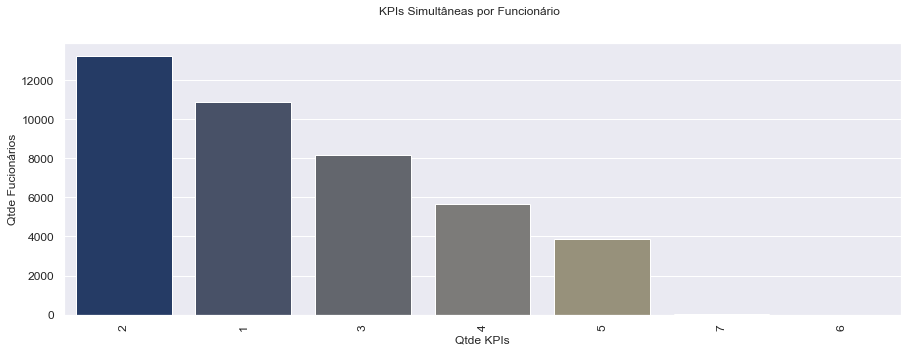

In [7]:
# Contagem de valores únicos por funcionários e mês
group_func = df.groupby(['dis_nome_funcionario', 'ord_mes_referencia']).nunique()

# Quantidade de KPIs por Funcionário
descending_order = group_func['nom_codigo_kpi'].value_counts().sort_values(ascending=False).index

fig, axs = plt.subplots(figsize=figsize)
plt.suptitle('KPIs Simultâneas por Funcionário')

ax1 = sns.countplot(group_func['nom_codigo_kpi'], palette=colormap, order=descending_order)
ax1.set_xlabel('Qtde KPIs')
ax1.set_ylabel('Qtde Fucionários')
for tick in axs.get_xticklabels():
    tick.set_rotation(90)

## Metas por diretoria

Vamos analisar o atingimento das metas por diretoria.

In [8]:
cols = meta.filter(regex='^per_', axis=0).index.values
cols = np.append(['nom_diretoria', 'ord_mes_referencia'], cols)
mean_dir_month = df[cols].groupby(by=['nom_diretoria', 'ord_mes_referencia']).mean().reset_index()

### Acumulado mensal

Neste gráfico podemos observar que o atingimento mensal da meta é relativamente constante em quase todas as diretorias, mas apenas 2 chegaram ao final do mês 12 com 100% atingido.

(<Figure size 1080x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0dd94240>)

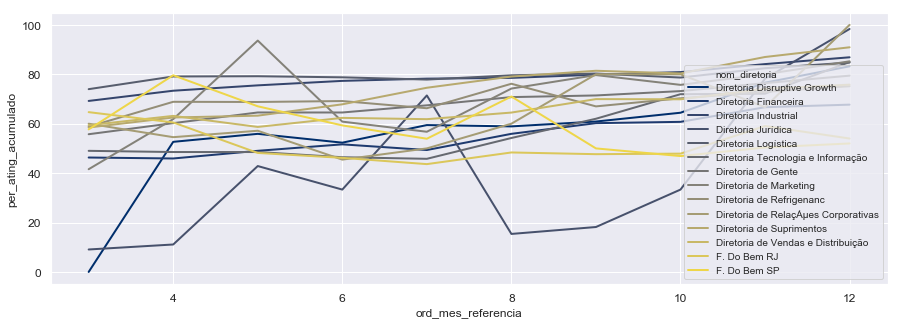

In [9]:
plt.subplots(figsize=figsize)
sns.lineplot(x="ord_mes_referencia", y="per_ating_acumulado", 
             data=mean_dir_month, hue='nom_diretoria', palette=colormap)

### Acumulado considerando atingimento parcial
Podemos observar neste outro gráfico que, considerando o atingimento parcial, as metas sistematicamente não são alcançadas. Com isso podemos chegar à conclusão que a regra está irreal. Uma alteração na regra de atingimento parcial seria bem vinda e traria para mais perto da realidade.

Considerando o gráfico anterior, uma regra base poderia considerar o atingimento parcial acima de 60% ou 70%, onde muitas diretorias consigiriam evoluir nas suas metas.

(<Figure size 1080x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0dcc2a90>)

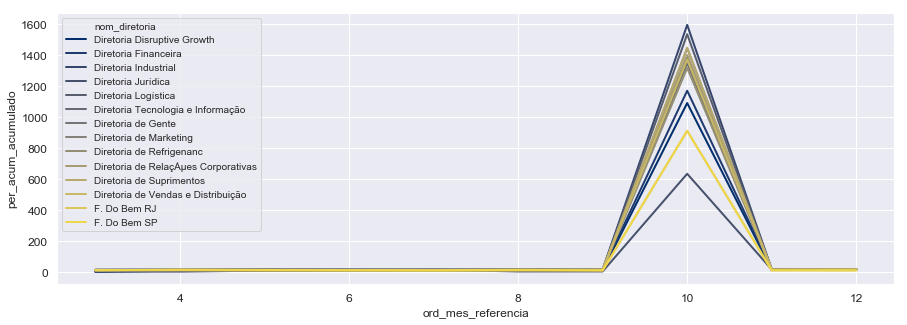

In [10]:
plt.subplots(figsize=figsize)
sns.lineplot(x="ord_mes_referencia", y="per_acum_acumulado", 
             data=mean_dir_month, hue='nom_diretoria', palette=colormap)